In [17]:
import pm4py
import graphviz
import pandas as pd

from pm4py.algo.filtering.log.attributes import attributes_filter
from pm4py.visualization.dfg import visualizer as dfg_visualizer

# Carregando dados

In [5]:
path = 'logs/anvisa.CSV'
df = pd.read_csv(path, sep=';', encoding='latin-1')
df = df.dropna()
df_log = df[['#NUM_EXPEDIENTE_PETICAO', 'DESC_GRUPO_ETAPA_CICLO_ANALISE', 'DATA_FIM_OCORRENCIA_GRP_ETAPA']]
df_log = df_log.rename(columns={'#NUM_EXPEDIENTE_PETICAO': 'case_id',
                       'DESC_GRUPO_ETAPA_CICLO_ANALISE': 'activity',
                       'DATA_FIM_OCORRENCIA_GRP_ETAPA': 'timestamp_log'})
df_log = pm4py.format_dataframe(df_log, case_id='case_id', activity_key='activity', timestamp_key='timestamp_log')
df_log = df_log.drop(['case_id', 'activity', 'timestamp_log'], axis=1)
df_log['time:timestamp'] = pd.to_datetime(df_log['time:timestamp'])
event_log = pm4py.convert_to_event_log(df_log)
event_log


<ipython-input-5-ece19ca86cfa>:2: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';', encoding='latin-1')


[{'attributes': {'concept:name': '10000085.0'}, 'events': [{'concept:name': 'Fila de Análise', 'time:timestamp': Timestamp('2008-01-07 00:00:00+0000', tz='UTC'), '@@index': 0, '@@case_index': 0}, '..', {'concept:name': 'Finalização', 'time:timestamp': Timestamp('2008-02-18 00:00:00+0000', tz='UTC'), '@@index': 2, '@@case_index': 0}]}, '....', {'attributes': {'concept:name': '999994179.0'}, 'events': [{'concept:name': 'Fila de Análise', 'time:timestamp': Timestamp('2017-06-28 13:46:00+0000', tz='UTC'), '@@index': 745261, '@@case_index': 195249}, '..', {'concept:name': 'Finalização', 'time:timestamp': Timestamp('2017-07-10 00:00:00+0000', tz='UTC'), '@@index': 745262, '@@case_index': 195249}]}]

## Gerando uma atividade

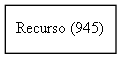

In [38]:
nome_atividade = "Recurso"
log_filtred = attributes_filter.apply_events(event_log, [nome_atividade], parameters={"attribute_key": "concept:name"})
dfg, start_activities, end_activities = pm4py.discover_dfg(log_filtred)
parameters = {
    "format": "png"
}
gviz = dfg_visualizer.apply(dfg, log=log_filtred, parameters={"format": "png"})
dfg_visualizer.view(gviz)

In [39]:
path_save_file = 'imgs/anvisa/atividade.png'
dfg_visualizer.save(gviz, path_save_file)

''

## Atividade inicial

In [23]:
start_activities_count = pm4py.get_start_activities(event_log)
print("Atividades iniciais e suas contagens:", start_activities_count)

Atividades iniciais e suas contagens: {'Fila de Análise': 195215, 'Finalização': 16, 'Análise em Andamento': 18, 'Exigência': 1}


In [41]:
atividade_inicial_desejada = 'Fila de Análise' 

In [42]:
log_filtrado = attributes_filter.apply_events(event_log, [atividade_inicial_desejada], parameters={"attribute_key": "concept:name"})

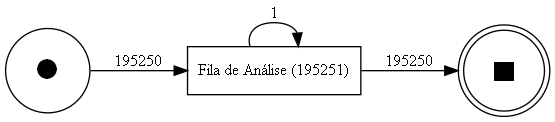

In [45]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log_filtrado)
pm4py.view_dfg(dfg, start_activities, end_activities)

## Atividade final

In [46]:
end_activities_count = pm4py.get_end_activities(event_log)
print("Atividades finais e suas contagens:", end_activities_count)

Atividades finais e suas contagens: {'Finalização': 184642, 'Análise de Cumprimento de Exigência': 464, 'Outras Etapas': 1733, 'Fila de Análise': 6414, 'Recurso': 945, 'Análise em Andamento': 642, 'Exigência': 410}


In [55]:
atividade_final_desejada = 'Outras Etapas' 

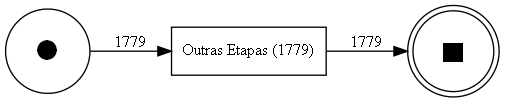

In [56]:
log_filtrado = attributes_filter.apply_events(event_log, [atividade_final_desejada], parameters={"attribute_key": "concept:name"})
dfg, start_activities, end_activities = pm4py.discover_dfg(log_filtrado)
pm4py.view_dfg(dfg, start_activities, end_activities)

## Transições

In [77]:
atividades = ['Recurso', 'Exigência', 'Outras Etapas']
log_filtrado = attributes_filter.apply_events(event_log, atividades, parameters={"attribute_key": "concept:name"})

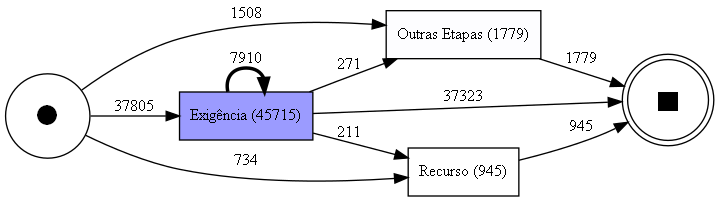

In [78]:
dfg, start_activities, end_activities = pm4py.discover_dfg(log_filtrado)
pm4py.view_dfg(dfg, start_activities, end_activities)